# Critical Role

In [5]:
import pandas as pd

In [6]:
df_critical_role = pd.read_csv('https://raw.githubusercontent.com/amiapmorais/datasets/master/critical_role/skills_dataset.txt', sep=';', error_bad_lines=False)
df_critical_role.head()

b'Skipping line 9: expected 3 fields, saw 4\nSkipping line 197: expected 3 fields, saw 4\nSkipping line 201: expected 3 fields, saw 4\nSkipping line 202: expected 3 fields, saw 4\nSkipping line 248: expected 3 fields, saw 4\nSkipping line 269: expected 3 fields, saw 4\nSkipping line 299: expected 3 fields, saw 4\nSkipping line 346: expected 3 fields, saw 4\nSkipping line 355: expected 3 fields, saw 4\nSkipping line 356: expected 3 fields, saw 4\nSkipping line 399: expected 3 fields, saw 4\nSkipping line 401: expected 3 fields, saw 4\nSkipping line 402: expected 3 fields, saw 5\nSkipping line 403: expected 3 fields, saw 4\nSkipping line 405: expected 3 fields, saw 4\nSkipping line 422: expected 3 fields, saw 4\nSkipping line 423: expected 3 fields, saw 4\nSkipping line 449: expected 3 fields, saw 4\nSkipping line 454: expected 3 fields, saw 4\nSkipping line 479: expected 3 fields, saw 4\nSkipping line 488: expected 3 fields, saw 4\nSkipping line 491: expected 3 fields, saw 4\nSkipping l

skill                                      check_line  \
0      Nature  MATT: Make a nature check for me, if you don't   
1      Nature                  TALIESIN: Nature check, oh no.   
2      Nature        TALIESIN: My nature check weirdly sucks.   
3  Persuasion                  MATT: Make a persuasion check.   
4  Perception   MATT: Sure. Make a perception check at first.   

                                       backward_text  
0  She looks back from the inside and goes-- He t...  
1  Error 404! The lip quiver. (laughter) She look...  
2  (laughter) She looks back and goes, "There's a...  
3  I'll help Beau! Yeah, I know, it's funny how m...  
4  cool! That's old business. We've seen that one...

In [7]:
df_critical_role.sample().values[0]

array(['History', 'MATT: You could roll a history check and probably',
       'But we can notify those in Kraghammer to buffer their defenses, close the tunnels that you took down there and my army as well, and that should give us time to prepare if we choose to "seize or at least seal them off." And your Order is what? "The Order of the Platinum Dragon." Right. That\'s a really good Order, right? History check, can I do a history check? It\'s a religion check. That\'s a religion check, not history check? Pike.'],
      dtype=object)

In [8]:
#df.groupby('skill').count()

In [9]:
#!pip install plotly==4.14.3

In [10]:
import plotly.graph_objects as go
grafico_label = go.Figure()
grafico_label.add_trace(go.Histogram(histfunc="count",  x=df_critical_role['skill']))
grafico_label

# Tavern Keeper

In [11]:
df_tavern_keeper = pd.read_csv('https://raw.githubusercontent.com/amiapmorais/datasets/master/tavern_keeper/skills_dataset.csv')
df_tavern_keeper.head(10)

skill                                      backward_text  \
0      History  > nodded accepting the parcel by ’s hands, in ...   
1  Performance  > nodded accepting the parcel by ’s hands, in ...   
2       Arcana  >"Aye, give me but a moment to study this piec...   
3     Medicine  >(Healing roll: to see if he can remember anyt...   
4     Survival  >(OOC: Travel roll. Do we need even to test co...   
5  Performance  >Walking along the path with his companions, s...   
6     Survival  >(Travel roll:)(OOC: RATS! RATS = Rolls Awful ...   
7         Roll                                           >travel    
8     Survival                                   >(Travel check)    
9     Survival  >(rolls Explore to keep in character and sugge...   

  original_name  
0          Lore  
1          Song  
2         Craft  
3       Healing  
4        Travel  
5          Song  
6        Travel  
7          Roll  
8        Travel  
9        Expore

In [12]:
# Filtrando o dataset apenas pelas skills 5e
skills = [
'Deception',
'Intimidation',
'Performance',
'Persuasion',
'Acrobatics',
'Sleight of Hand',
'Stealth',
'Arcana',
'History',
'Investigation',
'Nature',
'Religion',
'Athletics',
'Animal Handling',
'Insight',
'Medicine',
'Perception',
'Survival'
]

df_tavern_keeper_5e = df_tavern_keeper[df_tavern_keeper['skill'].isin(skills)].copy()

In [13]:
grafico_label = go.Figure()
grafico_label.add_trace(go.Histogram(histfunc="count",  x=df_tavern_keeper_5e['skill']))
grafico_label

# Data Frame da planilha de testes de perícia

In [14]:
df_skill_sheet = pd.read_csv('https://raw.githubusercontent.com/amiapmorais/datasets/master/skill_db.csv')
df_skill_sheet.head()

skill  check_line                                      backward_text
0  Acrobatics         NaN        Freeing yourself from grapples and the like
1  Acrobatics         NaN  Squeezing through tight spaces without losing ...
2  Acrobatics         NaN  Balancing on thin/fragile surfaces without fal...
3  Acrobatics         NaN                  Landing on your feet after a fall
4  Acrobatics         NaN  Ignoring falling damage, such as falling from ...

# Juntando os data frames

In [15]:
# Seleciona origem do treinamento
df_critical_role['origin'] = 'CR'
df_tavern_keeper_5e['origin'] = 'TK'
df_skill_sheet['origin'] = 'SS'

# Juntando em um unico data frame
list_df = [df_critical_role, df_tavern_keeper_5e]
df = pd.DataFrame(columns=['skill', 'check_line', 'backward_text', 'origin'])
df = df.append(list_df, ignore_index=True)

In [16]:
df.head()

skill                                      check_line  \
0      Nature  MATT: Make a nature check for me, if you don't   
1      Nature                  TALIESIN: Nature check, oh no.   
2      Nature        TALIESIN: My nature check weirdly sucks.   
3  Persuasion                  MATT: Make a persuasion check.   
4  Perception   MATT: Sure. Make a perception check at first.   

                                       backward_text origin original_name  
0  She looks back from the inside and goes-- He t...     CR           NaN  
1  Error 404! The lip quiver. (laughter) She look...     CR           NaN  
2  (laughter) She looks back and goes, "There's a...     CR           NaN  
3  I'll help Beau! Yeah, I know, it's funny how m...     CR           NaN  
4  cool! That's old business. We've seen that one...     CR           NaN

In [17]:
df.shape

(6129, 5)

In [18]:
grafico_label = go.Figure()
grafico_label.add_trace(go.Histogram(histfunc="count",  x=df['skill']))
grafico_label

# Limpando os dados

In [19]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy

In [20]:
import spacy

In [21]:
#!python -m spacy download en_core_web_sm

In [22]:
nlp = spacy.load("en_core_web_sm")

In [23]:
# Sem essa conversão, acontece um erro na hora de remover as stop words
df['backward_text'] = df['backward_text'].astype(str)
df['backward_text'] = df['backward_text'].str.lower()

In [24]:
# remove palavras muito comuns
nlp.vocab["going"].is_stop = True
nlp.vocab["right"].is_stop = True
nlp.vocab["okay"].is_stop = True
nlp.vocab["yeah"].is_stop = True
nlp.vocab["want"].is_stop = True
nlp.vocab["try"].is_stop = True
nlp.vocab["gonna"].is_stop = True
nlp.vocab["good"].is_stop = True
nlp.vocab["yes"].is_stop = True
nlp.vocab["no"].is_stop = True
nlp.vocab["oh"].is_stop = True
nlp.vocab["look"].is_stop = True
nlp.vocab["know"].is_stop = True
nlp.vocab["way"].is_stop = True
nlp.vocab["looks"].is_stop = True
nlp.vocab["guy"].is_stop = True
nlp.vocab["little"].is_stop = True
nlp.vocab["check"].is_stop = True
nlp.vocab["thin"].is_stop = True
nlp.vocab["thing"].is_stop = True
nlp.vocab["guys"].is_stop = True
nlp.vocab["come"].is_stop = True
nlp.vocab["roll"].is_stop = True
nlp.vocab["let"].is_stop = True
nlp.vocab["time"].is_stop = True
nlp.vocab["got"].is_stop = True
nlp.vocab["goes"].is_stop = True
nlp.vocab["maybe"].is_stop = True

# remove nome dos players e personagens
nlp.vocab["jester"].is_stop = True
nlp.vocab["caleb"].is_stop = True
nlp.vocab["nott"].is_stop = True
nlp.vocab["fjord"].is_stop = True
nlp.vocab["yasha"].is_stop = True
nlp.vocab["beau"].is_stop = True
nlp.vocab["matt"].is_stop = True
nlp.vocab["sam"].is_stop = True
nlp.vocab["travis"].is_stop = True
nlp.vocab["marisha"].is_stop = True
nlp.vocab["ashley"].is_stop = True
nlp.vocab["laura"].is_stop = True
nlp.vocab["liam"].is_stop = True
nlp.vocab["professor"].is_stop = True
nlp.vocab["thaddeus"].is_stop = True
nlp.vocab["taliesin"].is_stop = True
nlp.vocab["mollymauk"].is_stop = True
nlp.vocab["grog"].is_stop = True
nlp.vocab["pike"].is_stop = True

import re

def tokenize(str_text):

  # Manter apenas palavras
  words = re.sub(r"[^a-z]", ' ', str_text)
  # Remove palavras menores que 2 letras
  words = re.sub(r"\b[a-z]{1,2}\b", ' ', words)

  doc = nlp(words)
  # Remove stop Words, pontuação, mantendo apenas verbos e substantivos
  tokens = [token.text for token in doc if (not token.is_stop | token.is_punct) and token.pos_ == 'VERB' or token.pos_ == 'NOUN']
  
  return ' '.join(tokens)

In [25]:
print(tokenize('she looks back from the inside and goes 21?'))

inside


In [26]:
df['train_text'] = df['backward_text'].apply(tokenize)

In [27]:
df.head()

skill                                      check_line  \
0      Nature  MATT: Make a nature check for me, if you don't   
1      Nature                  TALIESIN: Nature check, oh no.   
2      Nature        TALIESIN: My nature check weirdly sucks.   
3  Persuasion                  MATT: Make a persuasion check.   
4  Perception   MATT: Sure. Make a perception check at first.   

                                       backward_text origin original_name  \
0  she looks back from the inside and goes-- he t...     CR           NaN   
1  error 404! the lip quiver. (laughter) she look...     CR           NaN   
2  (laughter) she looks back and goes, "there's a...     CR           NaN   
3  i'll help beau! yeah, i know, it's funny how m...     CR           NaN   
4  cool! that's old business. we've seen that one...     CR           NaN   

                                          train_text  
0  inside tried lip quiver laughter seaweed steps...  
1  lip quiver laughter seaweed steps doesn enter ...  
2  laughter seaweed steps doesn enter structure s...  
3  nature looking seaweed variety clustered rest ...  
4  business seen guys rest use hit dice thing tak...

In [28]:
# Amostra estratificada com reposição >> Risco de viciar o modelo
df_estrat = df.groupby('skill').apply(pd.DataFrame.sample, n=300, replace=True).reset_index(drop=True)

# Descomentar quando a massa de dados tiver mais que 300 exemplos de cada skill
#df_estrat = df.groupby('skill').apply(pd.DataFrame.sample, n=300).reset_index(drop=True)

# Treinando o modelo

In [29]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [30]:
# Split dos dados em treino e validação
X_train, X_test, y_train, y_test = train_test_split(df_estrat['train_text'], df_estrat['skill'], random_state = 0)

In [31]:
#Adicionando as ações da planilha a base de treinamento
df_skill_sheet['backward_text'] = df_skill_sheet['backward_text'].astype(str)
df_skill_sheet['backward_text'] = df_skill_sheet['backward_text'].str.lower()

df_skill_sheet['train_text'] = df['backward_text'].apply(tokenize)

X_train = X_train.append(df_skill_sheet['train_text'])
y_train = y_train.append(df_skill_sheet['skill'])

In [32]:
# Bag of words
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [33]:
print(count_vect.get_feature_names())

e', 'sided', 'sidelined', 'sides', 'siding', 'siege', 'siff', 'sift', 'sifting', 'sigh', 'sighs', 'sight', 'sighted', 'sightedness', 'sigils', 'sigmund', 'sign', 'signal', 'signature', 'signed', 'signet', 'significance', 'signs', 'silence', 'silk', 'silks', 'silt', 'silver', 'silverware', 'similarity', 'simmering', 'simple', 'sinew', 'sing', 'singe', 'singed', 'singes', 'singing', 'singles', 'sings', 'sink', 'sinking', 'sinks', 'sip', 'siphons', 'sipping', 'sips', 'sire', 'siren', 'sister', 'sisters', 'sit', 'site', 'sits', 'sitting', 'situation', 'siz', 'size', 'sized', 'sizes', 'skak', 'skald', 'skein', 'skeleton', 'skeletons', 'sketch', 'sketchbook', 'skew', 'skewers', 'skid', 'skids', 'skies', 'skill', 'skills', 'skin', 'skinned', 'skip', 'skipping', 'skirfira', 'skirt', 'skitter', 'skitterers', 'skittering', 'skitting', 'skulking', 'skull', 'skulls', 'sky', 'skyport', 'skyscape', 'skyship', 'slab', 'slack', 'slackens', 'slain', 'slam', 'slammed', 'slamming', 'slams', 'slap', 'slap

In [34]:
# Transformando o bag of words em um tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [35]:
# Treinando o modelo
# pra treinar o modelo usa os 75% dos textos e dos labels, pra depois ele predizer
#clf = MultinomialNB().fit(X_train_tfidf, y_train)
%time clf = LinearSVC().fit(X_train_tfidf, y_train)

Wall time: 328 ms


In [36]:
#aqui ele cria um array do que foi predito dos 25% de teste de treinamento que não foi usado pra treinar o modelo
y_pred = clf.predict(count_vect.transform(X_test))

In [37]:
print(y_pred)

['Intimidation' 'History' 'Medicine' ... 'Animal Handling' 'Performance'
 'Nature']


In [38]:
from sklearn import metrics
#Adicionando as ações da planilha a acuracia foi de 0.45254901960784316 para 0.47058823529411764
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7414814814814815


In [39]:
#aqui ele pega a precisão de cara feature, porque ele compara a feature o acerto de cada feature ordenada do menor para o maior (em caso de números), ou ordem alfabética
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

     Acrobatics       0.68      0.70      0.69        74
Animal Handling       0.93      1.00      0.97        86
         Arcana       0.81      0.75      0.78        73
      Athletics       0.57      0.71      0.63        68
      Deception       0.63      0.72      0.67        64
        History       0.81      0.73      0.77        79
        Insight       0.76      0.63      0.69        75
   Intimidation       0.76      0.78      0.77        82
  Investigation       0.56      0.42      0.48        69
       Medicine       0.79      0.85      0.82        68
         Nature       0.88      0.79      0.83        73
     Perception       0.53      0.29      0.38        85
    Performance       0.90      0.99      0.94        70
     Persuasion       0.70      0.61      0.65        72
       Religion       0.78      0.92      0.84        79
Sleight of Hand       0.71      0.99      0.82        80
        Stealth       0.63    

In [40]:
acrobatics = 'seeing his princess wrap a black cord he says, oh this is gonna be fun, much appreciated.  "Metal, second verse same as the first " as he tumbles behind the next living spell '
athletics = 'ASHLEY: Right, okay. MATT: That finishes its turn. Beau, you are up. You watch Yasha slam on the ground, unconscious next to you, the blade clattering to the ground and coming to rest. The creature lifts up (wheezing) and vanishes into the stone above you. MARISHA: I can not get a reaction from it, as it goes? MATT: It was not close enough to you, unfortunately. MARISHA: Fuck. Im going to run over to this bookcase and put my staff behind it to see if I can knock it over. MATT: You get the staff on the fulcrum.'
survival = 'Thanks to Halbarad s advice and map, Ren felt prepared for the route they would take on the journey.'
insight = 'Will pay keen attention to read into any suggestion of how the news is presented to Thorin  and how welcome it is to him. Zaken has a sneaky feeling that Thorin has something lingering in his mind  from the meeting they had yesterday anyway.'
religion = 'i try recognize the holy symbol'
acrobatics2 = 'you tumble the strike'

In [41]:
print(tokenize(acrobatics))

seeing princess wrap cord says gon fun appreciated verse tumbles living spell


In [42]:
# ao invés de dar o predict, retornar os 3 maiores skills com probabilidade prevista
print(clf.predict(count_vect.transform([tokenize(religion)])))

['Religion']


# Matriz de confusão

In [43]:
import numpy as np
skill_arr = np.array(df['skill'].unique())
skill_arr = np.sort(skill_arr)

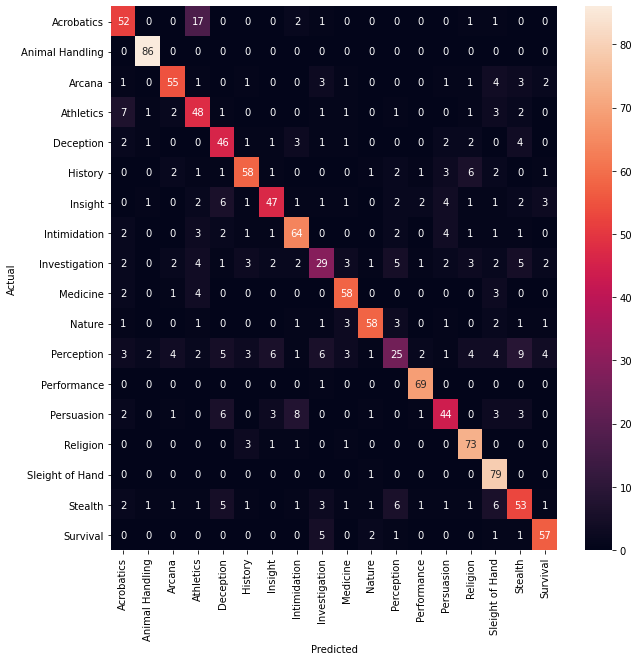

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=skill_arr, yticklabels=skill_arr)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [45]:
y_test.value_counts()

Animal Handling    86
Stealth            86
Perception         85
Intimidation       82
Sleight of Hand    80
History            79
Religion           79
Insight            75
Acrobatics         74
Nature             73
Arcana             73
Persuasion         72
Performance        70
Investigation      69
Athletics          68
Medicine           68
Survival           67
Deception          64
Name: skill, dtype: int64

# Wordclouds + bag of words

In [46]:
#!pip install wordcloud

In [47]:
from wordcloud import WordCloud

In [48]:
# Fazer o wordcloud com base no df_estrat ao invés de df

def print_wordcloud(skill_name):
  skills_backward = df[df['skill'] == skill_name]
  document = ' '.join(skills_backward['train_text'])

  wordcloud = WordCloud(background_color="white").generate(document)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  print(skill_name)

In [49]:
def BOW(skill_name):
  skills_backward = df[df['skill'] == skill_name]
  backward_train, backward_test, skill_train, skill_test = train_test_split(skills_backward['train_text'], skills_backward['skill'], random_state = 0)
  
  count_vect_skill = CountVectorizer()
  count_vect_skill.fit_transform(backward_train)
  print(count_vect_skill.get_feature_names())

Deception


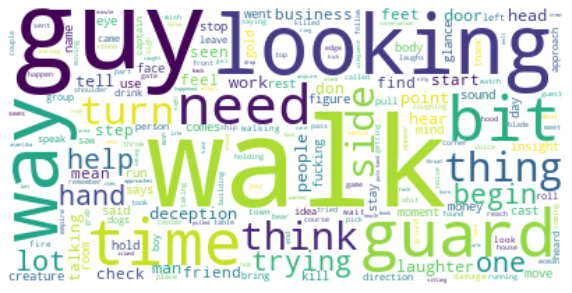

In [50]:
print_wordcloud('Deception')

In [51]:
BOW('Deception')

['accent', 'access', 'acknowledge', 'acquire', 'act', 'action', 'adhesive', 'administrating', 'administrator', 'admit', 'adopted', 'adorns', 'advantage', 'advice', 'advisor', 'agree', 'agreed', 'agrees', 'ahem', 'aid', 'air', 'alchemist', 'alcoves', 'ale', 'alert', 'allegiance', 'alley', 'alleys', 'allow', 'alms', 'alter', 'amateurs', 'amphitheater', 'angels', 'animals', 'ankles', 'answer', 'anyting', 'apocalypse', 'appear', 'appearance', 'appears', 'appreciated', 'approach', 'approached', 'approaches', 'approaching', 'arc', 'arch', 'archers', 'arches', 'archways', 'area', 'areas', 'argument', 'arm', 'armor', 'arms', 'arrangement', 'arrest', 'arrived', 'arrows', 'arts', 'ascend', 'ash', 'ask', 'asked', 'asking', 'assassin', 'assigned', 'assistant', 'assume', 'assumed', 'assumptions', 'asum', 'ate', 'atmosphere', 'attached', 'attack', 'attacked', 'attacking', 'attacks', 'attempt', 'attempting', 'attempts', 'attention', 'audience', 'authorities', 'authority', 'auto', 'avantika', 'avertin

Intimidation


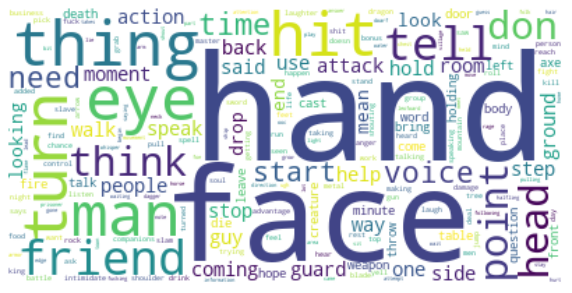

In [52]:
print_wordcloud('Intimidation')

In [53]:
BOW('Intimidation')

['abandoning', 'abdomen', 'ability', 'accept', 'access', 'accord', 'accordance', 'act', 'acting', 'action', 'actions', 'added', 'adding', 'admit', 'admonishment', 'advantage', 'adversaries', 'advice', 'agree', 'agreement', 'aid', 'air', 'alarm', 'alert', 'alertness', 'allegiance', 'allies', 'allow', 'allows', 'amdir', 'amount', 'anduin', 'anger', 'ankle', 'ankles', 'answer', 'answered', 'answering', 'answers', 'appear', 'appears', 'applaud', 'apple', 'appreciate', 'appreciation', 'apprehending', 'approach', 'arc', 'archer', 'area', 'areas', 'arm', 'armor', 'armour', 'armours', 'arms', 'army', 'arranged', 'arrest', 'arresting', 'arrow', 'arse', 'ash', 'ask', 'asked', 'asking', 'asks', 'assigned', 'assist', 'assistance', 'assume', 'atmosphere', 'attached', 'attack', 'attacked', 'attacking', 'attacks', 'attempt', 'attempts', 'attention', 'attracted', 'authority', 'ava', 'avoid', 'awakes', 'awe', 'axe', 'back', 'backfeed', 'backs', 'bador', 'bag', 'bail', 'bakery', 'balcony', 'ball', 'ball

Performance


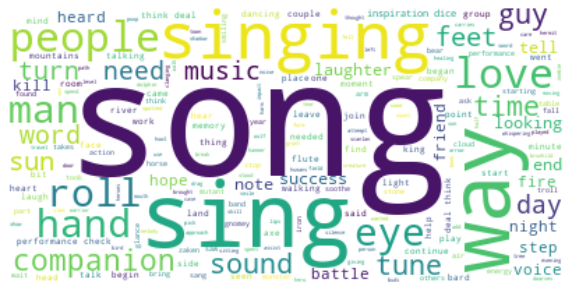

In [54]:
print_wordcloud('Performance')

In [55]:
BOW('Performance')

['abs', 'accepting', 'accompanied', 'acquaintance', 'acrobatics', 'action', 'actions', 'added', 'addition', 'agreed', 'agrees', 'aimed', 'air', 'altar', 'amount', 'ancestors', 'anduin', 'animals', 'answer', 'anvil', 'applause', 'approached', 'approve', 'areas', 'ariseon', 'arm', 'armor', 'arms', 'arrested', 'arrived', 'arrow', 'artagan', 'ask', 'asks', 'assume', 'atmosphere', 'attempt', 'attention', 'autobiography', 'autopilot', 'avoid', 'awed', 'axe', 'backfire', 'ballad', 'band', 'bard', 'barkeep', 'battle', 'bear', 'beat', 'beauty', 'beers', 'began', 'begin', 'beginner', 'begins', 'bet', 'bit', 'bite', 'biting', 'blade', 'blood', 'blowing', 'bodies', 'bolt', 'book', 'born', 'bother', 'bound', 'bow', 'bowed', 'bowing', 'bowls', 'bowman', 'bowyer', 'boy', 'brand', 'brass', 'break', 'breast', 'breath', 'breather', 'breathing', 'breeze', 'brides', 'brings', 'brochures', 'broken', 'brother', 'brought', 'bruises', 'brunhild', 'brushwork', 'buddies', 'buds', 'building', 'builds', 'bullet',

Persuasion


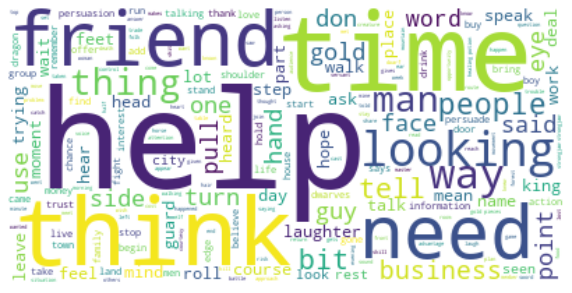

In [56]:
print_wordcloud('Persuasion')

In [57]:
BOW('Persuasion')

ed', 'fuckers', 'fucking', 'fungus', 'furl', 'furnace', 'furred', 'fury', 'fuss', 'fyllin', 'gagging', 'gain', 'game', 'games', 'gap', 'garlic', 'garments', 'garricks', 'garthak', 'garthok', 'gasps', 'gate', 'gates', 'gather', 'gathering', 'gave', 'gear', 'gem', 'gems', 'generations', 'gentleman', 'gentlemen', 'gestures', 'gesturing', 'gets', 'getting', 'giants', 'giggling', 'gilmore', 'girl', 'given', 'gives', 'giving', 'glade', 'glaive', 'glance', 'glances', 'glass', 'glasses', 'glittering', 'glory', 'glow', 'glows', 'gnome', 'gnomes', 'goal', 'goals', 'goblet', 'goblin', 'goblins', 'goddamn', 'gods', 'gold', 'goliaths', 'gon', 'gondor', 'gone', 'good', 'goods', 'gossip', 'gouge', 'grab', 'grabbed', 'grabbing', 'grabs', 'grace', 'grains', 'gram', 'grappling', 'grasps', 'grass', 'grave', 'graze', 'greaters', 'greatness', 'greed', 'greet', 'greeted', 'greetings', 'greyspine', 'greyspines', 'grid', 'groaning', 'grog', 'ground', 'grounds', 'group', 'grow', 'growing', 'growl', 'growls', '

Acrobatics


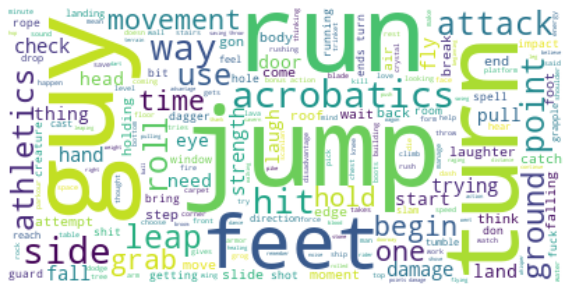

In [58]:
print_wordcloud('Acrobatics')

In [59]:
BOW('Acrobatics')

['abandoned', 'ability', 'achilles', 'acknowledged', 'acrobatics', 'action', 'actions', 'add', 'addition', 'adhering', 'advantage', 'affect', 'affected', 'aggression', 'aid', 'air', 'alleviate', 'alley', 'allies', 'allow', 'angel', 'angered', 'animal', 'answer', 'answered', 'anticipated', 'appear', 'approach', 'approaching', 'arc', 'archer', 'archers', 'arcs', 'area', 'arm', 'armor', 'arms', 'arrow', 'ascending', 'ask', 'asking', 'ass', 'asses', 'asshole', 'assist', 'assisting', 'asum', 'athletics', 'attached', 'attaches', 'attack', 'attacks', 'attempt', 'attempting', 'attempts', 'attention', 'attracted', 'attribute', 'attributes', 'audience', 'autobiography', 'avoid', 'axe', 'back', 'backflip', 'backing', 'backs', 'balance', 'balcony', 'ball', 'balloon', 'balls', 'banister', 'bar', 'barbarian', 'bard', 'barrel', 'barring', 'bars', 'based', 'basket', 'bay', 'beacon', 'beam', 'beams', 'bean', 'bear', 'beard', 'bearing', 'bearings', 'beast', 'beat', 'beau', 'beauty', 'bed', 'bedding', 'b

Sleight of Hand


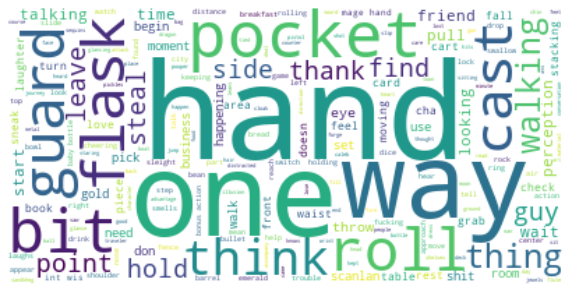

In [60]:
print_wordcloud('Sleight of Hand')

In [61]:
BOW('Sleight of Hand')

['ability', 'accompany', 'accusing', 'action', 'add', 'advantage', 'affection', 'air', 'ale', 'allies', 'ante', 'anvil', 'appear', 'approach', 'area', 'arrivals', 'artisans', 'ass', 'assholes', 'assume', 'assure', 'attach', 'attached', 'attack', 'attention', 'attuning', 'baby', 'back', 'bag', 'baked', 'ball', 'barkeep', 'barrel', 'base', 'baubles', 'bearings', 'beating', 'bed', 'begin', 'beginning', 'begins', 'belt', 'bit', 'black', 'bleeding', 'blow', 'bonus', 'book', 'books', 'bottle', 'bowl', 'branded', 'brass', 'bread', 'break', 'breakfast', 'breaking', 'breathing', 'bree', 'brevity', 'broken', 'bubble', 'building', 'burnt', 'burt', 'business', 'busted', 'caged', 'caleb', 'call', 'calling', 'came', 'camera', 'cantrip', 'card', 'cards', 'care', 'cart', 'carved', 'carvers', 'case', 'casies', 'cast', 'caster', 'cat', 'caught', 'center', 'cha', 'chagrined', 'chains', 'chance', 'change', 'chanting', 'chaos', 'character', 'characters', 'check', 'cheering', 'chin', 'choose', 'city', 'clas

Stealth


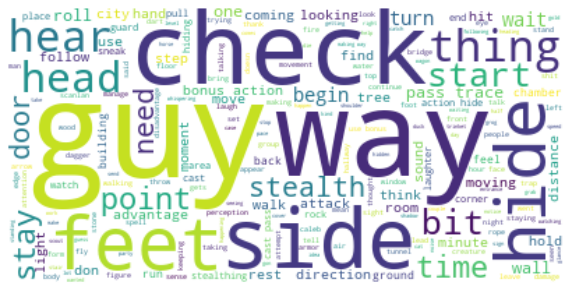

In [62]:
print_wordcloud('Stealth')

In [63]:
BOW('Stealth')

esight', 'face', 'faces', 'facility', 'facing', 'fact', 'factor', 'fade', 'faded', 'fail', 'failed', 'failing', 'fairy', 'fall', 'fallen', 'falling', 'falls', 'family', 'fan', 'fancy', 'fangs', 'fargo', 'farm', 'farmer', 'farmers', 'fast', 'faucet', 'favored', 'feared', 'feat', 'feathers', 'features', 'featuring', 'feed', 'feeding', 'feel', 'feeling', 'feet', 'fellows', 'female', 'fenthras', 'fiction', 'fiddling', 'field', 'fight', 'fighter', 'fighting', 'figure', 'figured', 'figures', 'fill', 'filled', 'filling', 'find', 'finding', 'fine', 'finger', 'fingers', 'finish', 'finished', 'finishes', 'finishing', 'fire', 'fireball', 'firebrand', 'firelight', 'fires', 'fist', 'fix', 'fjord', 'flame', 'flames', 'flank', 'flanked', 'flanking', 'flare', 'flashes', 'flashlights', 'flaute', 'flecks', 'fled', 'flesh', 'flickering', 'flies', 'flip', 'floating', 'floor', 'flounder', 'flow', 'flower', 'flows', 'flute', 'flutist', 'flux', 'fly', 'flyby', 'flying', 'focus', 'focused', 'focusing', 'foil'

Arcana


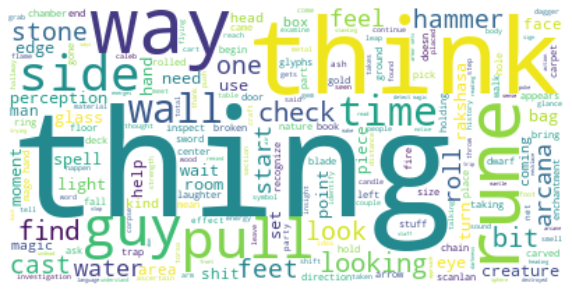

In [64]:
print_wordcloud('Arcana')

In [65]:
BOW('Arcana')

['abilities', 'ability', 'accept', 'accident', 'acid', 'action', 'activate', 'activity', 'add', 'addition', 'adds', 'adorns', 'advantage', 'affect', 'affixed', 'aghast', 'agree', 'agrees', 'ahem', 'aid', 'aim', 'air', 'ale', 'allowing', 'ambassador', 'amdir', 'amount', 'angel', 'animals', 'answer', 'anticipated', 'appearing', 'appears', 'approach', 'approval', 'approved', 'arcana', 'arcane', 'architecture', 'area', 'armed', 'armor', 'arms', 'aroma', 'arrow', 'arrows', 'art', 'artificer', 'ascertain', 'ash', 'ashes', 'ask', 'asked', 'asking', 'asks', 'aspar', 'ass', 'assembling', 'athletics', 'attempt', 'attempting', 'attributes', 'aura', 'authority', 'autumn', 'axe', 'aye', 'back', 'bag', 'balcony', 'ball', 'bands', 'base', 'based', 'basis', 'battle', 'beach', 'bead', 'beams', 'beans', 'bedrooms', 'begin', 'begins', 'begun', 'belt', 'berries', 'bit', 'bits', 'bitten', 'black', 'blade', 'blink', 'blue', 'boat', 'bodies', 'body', 'boiling', 'bolted', 'bolting', 'bone', 'bonus', 'booby', 

History


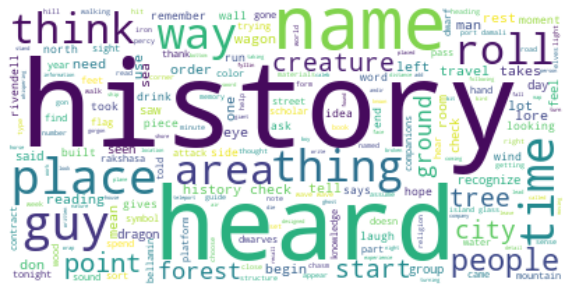

In [66]:
print_wordcloud('History')

In [67]:
BOW('History')

['abilities', 'accepting', 'access', 'aching', 'adama', 'add', 'added', 'addition', 'adv', 'advancement', 'advantage', 'adversion', 'advice', 'affairs', 'afraid', 'agree', 'agrees', 'air', 'alchemist', 'allies', 'allocate', 'allowed', 'allows', 'amdir', 'amount', 'anarchists', 'anchor', 'anduin', 'annoyed', 'answer', 'answers', 'apologies', 'appear', 'appearance', 'appears', 'appraising', 'appreciation', 'approaches', 'approved', 'area', 'areas', 'aren', 'argue', 'armor', 'army', 'arranged', 'arrival', 'arrive', 'arrived', 'arrives', 'arriving', 'ashari', 'ask', 'asked', 'asking', 'aspects', 'assault', 'assemble', 'assists', 'associated', 'assume', 'assuming', 'attack', 'attacked', 'attacks', 'attempt', 'attempts', 'attend', 'attention', 'avail', 'axe', 'backed', 'background', 'badass', 'bag', 'baldor', 'balls', 'band', 'bane', 'banks', 'bar', 'bard', 'barricade', 'base', 'based', 'battle', 'bay', 'bearing', 'beast', 'beasts', 'beauty', 'begin', 'begins', 'begun', 'beings', 'bell', 'be

Investigation


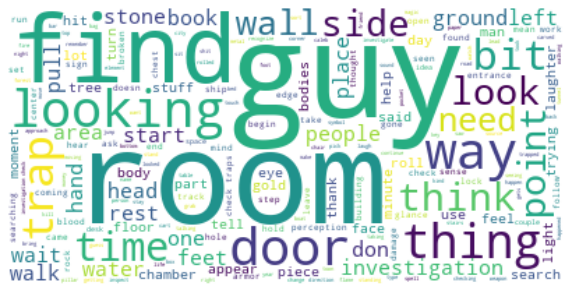

In [68]:
print_wordcloud('Investigation')

In [69]:
BOW('Investigation')

, 'hide', 'hideout', 'hiding', 'hilda', 'hill', 'hills', 'hindrance', 'hinge', 'hinges', 'hint', 'history', 'hit', 'hits', 'hitting', 'hoard', 'hold', 'holding', 'holds', 'hole', 'holes', 'hollow', 'home', 'homes', 'hoodie', 'hooks', 'hop', 'hope', 'hoping', 'horned', 'horse', 'horses', 'hostage', 'hotel', 'hotis', 'hour', 'hours', 'house', 'hovel', 'hugs', 'hum', 'humanoid', 'humanoids', 'humans', 'humming', 'hums', 'hundreds', 'hunk', 'hunt', 'hunting', 'hurry', 'hurt', 'huts', 'hyenas', 'ice', 'ichor', 'iconography', 'idea', 'ideas', 'identify', 'identifying', 'idiots', 'illuminate', 'illuminates', 'illusion', 'image', 'imagery', 'imagine', 'imagined', 'impact', 'impacted', 'impacts', 'imparted', 'importance', 'impressions', 'inability', 'incarnate', 'incense', 'inch', 'inches', 'inclination', 'included', 'including', 'incursion', 'indications', 'individuals', 'infection', 'info', 'information', 'infuriating', 'initiate', 'initiative', 'inkwell', 'inkwells', 'innocence', 'inns', 'in

Nature


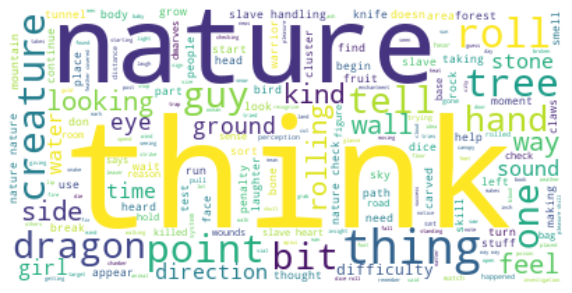

In [70]:
print_wordcloud('Nature')

In [71]:
BOW('Nature')

['achieve', 'acid', 'acknowledged', 'acrobatics', 'action', 'activity', 'add', 'added', 'adjust', 'advance', 'advantage', 'adventure', 'affectation', 'afternoon', 'agility', 'ahn', 'air', 'alcove', 'alert', 'allowed', 'amazement', 'amount', 'ancestors', 'animal', 'animals', 'animus', 'ankle', 'ankles', 'anthill', 'ape', 'apius', 'appear', 'appearance', 'appears', 'applied', 'applies', 'appreciate', 'approach', 'arcana', 'arch', 'archer', 'area', 'arms', 'arousal', 'aroused', 'arrived', 'arrow', 'ash', 'ashari', 'ask', 'asking', 'aspects', 'assist', 'assume', 'assumption', 'astute', 'athletics', 'atributes', 'attack', 'attempted', 'attention', 'attract', 'attributes', 'authority', 'avenged', 'avoid', 'await', 'aye', 'baby', 'back', 'backpack', 'badger', 'badgers', 'bag', 'balance', 'ball', 'bamfed', 'bandage', 'bandages', 'bandits', 'bands', 'bar', 'barrel', 'bars', 'base', 'based', 'basilisk', 'basilisks', 'basis', 'basket', 'beach', 'bead', 'beaks', 'beams', 'beard', 'bearing', 'beast

Religion


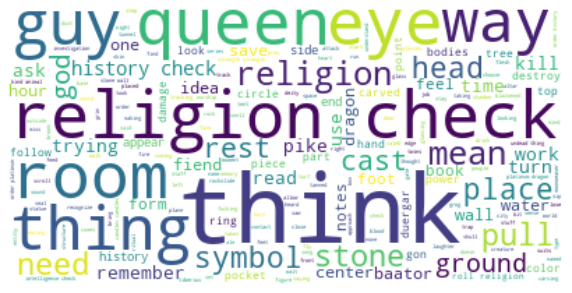

In [72]:
print_wordcloud('Religion')

In [73]:
BOW('Religion')

['absorb', 'abyss', 'acid', 'acolytes', 'action', 'advantage', 'agree', 'airway', 'ale', 'allegiance', 'allhammer', 'allow', 'alphabet', 'altar', 'alter', 'ambushed', 'angle', 'animal', 'anime', 'appear', 'appears', 'approach', 'arbiter', 'area', 'aren', 'army', 'array', 'ask', 'asking', 'attack', 'attacks', 'attempt', 'auto', 'awoke', 'baator', 'back', 'banish', 'banks', 'banners', 'barrel', 'barreled', 'base', 'based', 'bases', 'basilisk', 'bat', 'batch', 'battle', 'bear', 'beasts', 'beat', 'beating', 'begin', 'beginning', 'bell', 'bit', 'blackened', 'blade', 'blasting', 'blocking', 'blood', 'bodies', 'body', 'bone', 'bones', 'book', 'books', 'bottom', 'box', 'boxes', 'boys', 'braziers', 'breaks', 'briarwoods', 'bring', 'bringer', 'brings', 'broom', 'brother', 'buffer', 'built', 'bullshit', 'bungled', 'buried', 'burn', 'burned', 'business', 'buzzards', 'cabinet', 'cache', 'caleb', 'called', 'came', 'campsite', 'candles', 'captain', 'carnival', 'carpet', 'carry', 'carve', 'carved', 'c

Athletics


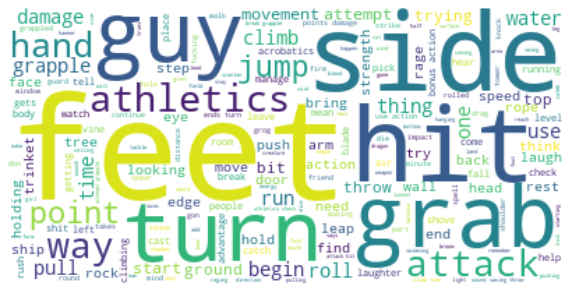

In [74]:
print_wordcloud('Athletics')

In [75]:
BOW('Athletics')

, 'bear', 'beard', 'bearings', 'bears', 'beat', 'beaten', 'beats', 'beau', 'beauty', 'bed', 'beefcakes', 'began', 'begin', 'beginning', 'begins', 'beholder', 'being', 'belief', 'believe', 'belly', 'bend', 'betting', 'bird', 'bisecting', 'bit', 'bitch', 'bite', 'bites', 'bits', 'blacksmithing', 'blade', 'blades', 'blast', 'blaze', 'bleached', 'blend', 'bless', 'blindfolded', 'blinding', 'block', 'blockage', 'blocked', 'blocking', 'blood', 'bloodaxe', 'blow', 'bludgeoning', 'bluffs', 'blur', 'boat', 'bodies', 'body', 'bodyslam', 'bolt', 'bombs', 'bone', 'bones', 'bonus', 'book', 'bookcase', 'boom', 'boots', 'bothering', 'bottle', 'bottles', 'bottom', 'boulders', 'bound', 'bow', 'box', 'boy', 'boys', 'braces', 'brain', 'bramnir', 'branch', 'branches', 'break', 'breaking', 'breakneck', 'breaks', 'breasts', 'breath', 'breathe', 'breathes', 'breathing', 'bree', 'bridge', 'brigand', 'brimstone', 'bring', 'bringing', 'brings', 'brininess', 'bro', 'broke', 'broken', 'broom', 'brother', 'brought

Animal Handling


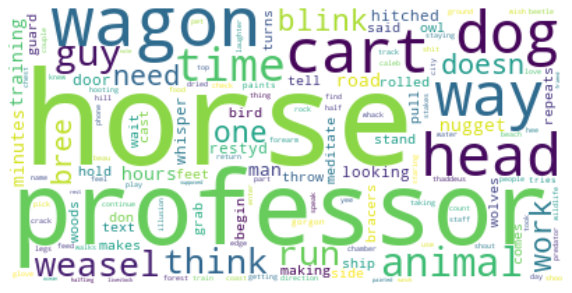

In [76]:
print_wordcloud('Animal Handling')

In [77]:
BOW('Animal Handling')

['ack', 'amnesty', 'animals', 'animation', 'appear', 'arcane', 'arm', 'arrive', 'attempt', 'aye', 'back', 'balloon', 'based', 'beach', 'beast', 'beau', 'beetle', 'beetles', 'begin', 'begins', 'bet', 'betting', 'bill', 'bird', 'bite', 'blade', 'blindfolded', 'blink', 'blood', 'bodies', 'bond', 'boulders', 'bows', 'bracers', 'breath', 'bree', 'bridles', 'bringing', 'brother', 'browns', 'business', 'caleb', 'campsite', 'can', 'cart', 'cast', 'catch', 'caught', 'center', 'chamber', 'changes', 'check', 'cheek', 'cheese', 'chest', 'chirps', 'city', 'clomp', 'coast', 'comes', 'coming', 'compartments', 'considerate', 'continue', 'continues', 'control', 'corner', 'corrected', 'counting', 'couple', 'crack', 'crisp', 'curve', 'cussing', 'darkening', 'darling', 'decides', 'deer', 'destroy', 'determined', 'diaphragm', 'direction', 'distraction', 'doesn', 'dog', 'doggies', 'don', 'door', 'draft', 'dried', 'drink', 'drive', 'driving', 'effort', 'embankment', 'emerge', 'enjoy', 'enter', 'enters', 'ent

Insight


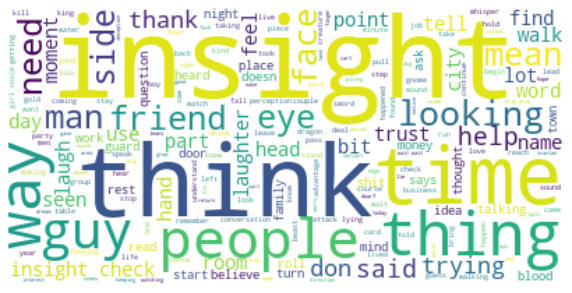

In [78]:
print_wordcloud('Insight')

In [79]:
BOW('Insight')

envoys', 'eon', 'episode', 'erebor', 'eroded', 'errands', 'escalating', 'escape', 'escorts', 'establish', 'establishment', 'eve', 'evening', 'events', 'evil', 'exacerbate', 'example', 'excuse', 'exist', 'existence', 'exit', 'exits', 'expected', 'expecting', 'expects', 'expediting', 'experience', 'experiment', 'experimentation', 'experiments', 'explains', 'explode', 'expressing', 'expression', 'exquisite', 'extend', 'extension', 'eye', 'eyeball', 'eyelids', 'eyes', 'fabrications', 'face', 'faces', 'facilitate', 'fact', 'fade', 'fades', 'failed', 'failing', 'fairy', 'fall', 'falling', 'falls', 'faltering', 'fame', 'families', 'family', 'fan', 'fared', 'farm', 'farmstead', 'fascinating', 'fashion', 'fat', 'fate', 'father', 'fault', 'favor', 'favored', 'favour', 'fear', 'fears', 'feast', 'feat', 'feathers', 'febron', 'feed', 'feel', 'feeling', 'feelings', 'feels', 'feet', 'fell', 'fella', 'fellow', 'fellows', 'fellowship', 'felt', 'feywild', 'fiction', 'fiddling', 'field', 'fields', 'fight

Medicine


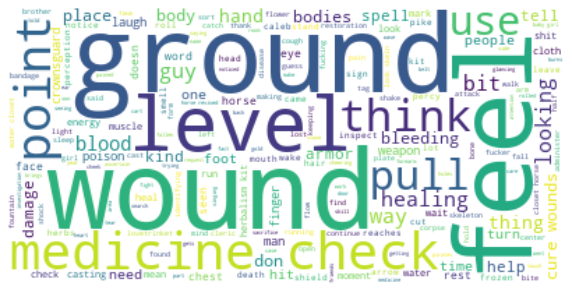

In [80]:
print_wordcloud('Medicine')

In [81]:
BOW('Medicine')

['ability', 'abs', 'action', 'administer', 'administering', 'administers', 'advantage', 'aid', 'ailment', 'allura', 'amount', 'ancestors', 'animal', 'animals', 'antiqued', 'antitoxin', 'apologize', 'appear', 'appears', 'appendages', 'apples', 'apply', 'approach', 'area', 'arm', 'armor', 'arms', 'army', 'arrow', 'ascertain', 'ash', 'asks', 'aspects', 'assist', 'assisting', 'assume', 'ate', 'attached', 'attack', 'attempt', 'attention', 'axe', 'aye', 'baby', 'back', 'bandage', 'bandages', 'bar', 'bark', 'barrel', 'barrels', 'base', 'basement', 'battle', 'bearer', 'beau', 'beauty', 'begin', 'bestowing', 'bet', 'biceps', 'bip', 'bit', 'bitch', 'bitches', 'bite', 'bites', 'bits', 'blade', 'bleeding', 'blessing', 'blinked', 'blinks', 'blintzes', 'blood', 'bloodied', 'bodies', 'body', 'bolts', 'bone', 'bones', 'bonus', 'bottom', 'boy', 'bracegirdle', 'break', 'breakfast', 'brethes', 'brings', 'brother', 'brought', 'bruise', 'bruised', 'buckle', 'bunch', 'burning', 'burns', 'butt', 'cabbage', '

Perception


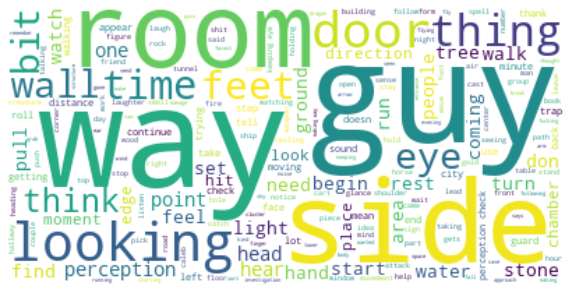

In [82]:
print_wordcloud('Perception')

In [83]:
BOW('Perception')

ximity', 'pseudo', 'psychology', 'pub', 'publicist', 'puddles', 'puff', 'puffing', 'pull', 'pulled', 'pulling', 'pulls', 'pulsating', 'pulse', 'pulses', 'pulsing', 'pumat', 'pumping', 'punch', 'punched', 'puncture', 'punished', 'pup', 'pupils', 'purchase', 'purchased', 'purchasing', 'purple', 'purpose', 'purposed', 'purposes', 'purse', 'pursue', 'pursuit', 'purveyor', 'push', 'pushed', 'pushes', 'pushing', 'puts', 'putting', 'pyramid', 'pyre', 'quality', 'quarry', 'quart', 'quarter', 'quartermaster', 'quarters', 'quartz', 'queen', 'question', 'questioning', 'questions', 'quick', 'quiet', 'quill', 'quiver', 'quivers', 'rabbi', 'raccoon', 'races', 'rack', 'racks', 'radius', 'raf', 'rafters', 'rage', 'raging', 'raided', 'rail', 'railings', 'rain', 'rained', 'rainfall', 'rains', 'raise', 'raised', 'raises', 'raising', 'rakanishu', 'rakshasa', 'rallies', 'ram', 'ramford', 'ramp', 'ran', 'range', 'ranger', 'ranges', 'ransacked', 'rapids', 'rapier', 'rapunzel', 'rarity', 'rat', 'rate', 'ratio

Survival


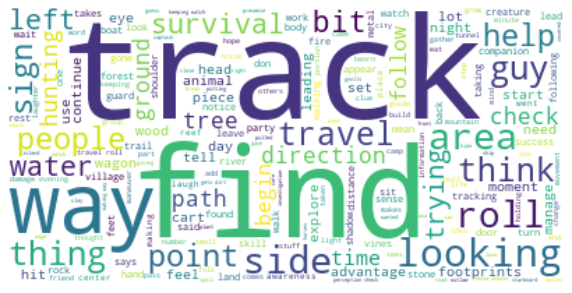

In [84]:
print_wordcloud('Survival')

In [85]:
BOW('Survival')

['abhorrent', 'abilities', 'ability', 'absence', 'accepted', 'acid', 'action', 'actions', 'acute', 'add', 'added', 'adding', 'advantage', 'advantages', 'advice', 'afternoon', 'age', 'agree', 'aim', 'aiming', 'aims', 'alarm', 'alert', 'alley', 'alleyway', 'allies', 'allows', 'amdir', 'amount', 'anduin', 'anger', 'animal', 'animals', 'ank', 'appear', 'appears', 'apple', 'apply', 'appreciation', 'approach', 'approaches', 'approaching', 'arcanum', 'archer', 'architecture', 'arcing', 'area', 'areas', 'arguing', 'armor', 'armors', 'arms', 'arrested', 'arrows', 'art', 'ash', 'ask', 'asked', 'asking', 'assistance', 'assume', 'athelas', 'atmosphere', 'attached', 'attack', 'attempt', 'attention', 'ava', 'avenues', 'avoid', 'avoiding', 'award', 'awareness', 'awaulf', 'axe', 'aye', 'back', 'backgrounds', 'badger', 'bador', 'bag', 'ball', 'bandit', 'banditry', 'bandits', 'bane', 'bank', 'bars', 'base', 'based', 'basil', 'batch', 'battered', 'battle', 'beacon', 'bear', 'beauty', 'beer', 'begin', 'be

#TODO

3.   Usar o steamming do Spacy, basicamente usar o radical das palavras, retirando plurais e conjugações.
5.   Com o bag of words tentar diferentes percentuais acumulados para construir as features com as palavras mais comuns para cada skill. Faz a limpeza do ruído e mantem apenas o sinal.

TO DOs
Lista de atividades pendentes para refinar o modelo e o pipeline, sem uma ordem específica:

Abrigar o código no git hub e abrir esses pontos de melhoria como issues que vamos baixando utilizando pull requests

Testar outros tipos de modelo (decision tree, random forest e NN - Neural Networks costumam ter um bom desempenho neste tipo de problema)

Ajustar a chamada da predição para trabalhar com a string com os mesmos tratamentos utilizados no treino (deve melhorar a eficiência) **criar uma função para isso** FEITO

Aumentar a quantidade de dados para treino

Separar o pipeline em scrapping (por fonte de dados), data prep (por fonte de dados), enrichment (combinação das fontes de dados), treino do modelo, escoragem e validação do modelo

Verificar uma forma mais elegante de passar / criar stopwords em grande volume no Spacy

Fazer análise de wordcloud utilizando os dados de treinamento

Fazer análise de bag of words utilizando os dados de treinamento

Fazer análise de bag of words com percentil acumulado de ocorrências (separar ruído de sinal) nas palavras que irão para o treinamento, colocar um ponto de corte

Testar modelo com menos linhas de texto do transcript, analisar se melhora o modelo.

Testar pegar apenas verbos e substantivos (POS - Part of Speech) com o Spacy, analisar se o modelo melhora FEITO

Testar lemmatização utilizando o Spacy, analisar se o modelo melhora.

Testar iterar pela parse tree do Spacy, testar se os ngramas (combinação de palavras que aparecem juntas) melhoram o modelo.

Extração de NER (nomes de players) utilizando o Spacy

ref. https://spacy.io/usage/linguistic-features

20/01
adicionar uma coluna com o texto feito o pos e outra coluna com o pos e o stemming